
Very simple example of words polarity analysis based on Logit Regression coefficients:

    crate pipeline of tfidf and lr
    join words/chars and lr coefs
    negative coef means positive polarity 1 / (1 + exp(-w))

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_formats = ["retina"]

In [2]:
def plot_words_polarity(df, tfidf):
    lr = LogisticRegression()
    p = make_pipeline(tfidf, lr)
    p.fit(df['comment_text'].values, df['toxic'].values)

    rev = sorted({v: k for k,v in p.steps[0][1].vocabulary_.items()}.items())
    # create a dataframe with the words sorted using 'coef' parameter of the linear regression
    # algorithm as index
    polarity = pd.DataFrame({'coef': p.steps[1][1].coef_[0]}, 
                            index = [i[1] for i in rev]).sort_values(by='coef', ascending=True)
    plt.figure(figsize=(20, 10))
    ax = plt.subplot(1,2,1)
    polarity.tail(20).plot(kind='barh', color='red', ax=ax)
    ax = plt.subplot(1,2,2)
    polarity.head(20).plot(kind='barh', color='green', ax=ax)

In [3]:
dtypes = {
    'comment_text'   : np.unicode ,
    'toxic':         np.int16, 
    'severe_toxic': np.int16,
    'obscene': np.int16,
    'threat': np.int16,
    'insult': np.int16,
    'identity_hate': np.int16
} 
train = pd.read_csv('data/train.csv', dtype=dtypes, encoding='utf-8')
print train.shape

(95851, 8)


In [4]:
df = train
tfidf = TfidfVectorizer(lowercase=True, ngram_range=(1,1), max_features=50000) # UNIGRAM
lr = LogisticRegression()
# create a pipeline that would creat the Tf-Idf vectorizers then fit them to
# the linear regression classifier
p = make_pipeline(tfidf, lr)
p.fit(df['comment_text'].values, df['toxic'].values)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=50000, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smo...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [5]:
df.toxic.value_counts()

0    86614
1     9237
Name: toxic, dtype: int64

In [6]:
p.steps[0][1] #to select the object of the TF-Idf vectorizer in the pipeline
# note that steps is an attribute of make_pipeline

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=50000, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [7]:
p.steps[0][1].vocabulary_.items() # a dict >> A mapping of terms to feature indices
                                  #of the Tf-Idf vectorizer

[(u'sowell', 41220),
 (u'woods', 49055),
 (u'spiders', 41489),
 (u'woody', 49059),
 (u'trawling', 45438),
 (u'comically', 9981),
 (u'gab', 18428),
 (u'naturopathic', 30543),
 (u'bringing', 7143),
 (u'jrpg', 24172),
 (u'wooden', 49049),
 (u'wednesday', 48277),
 (u'elgar', 15234),
 (u'thrace', 44627),
 (u'thraco', 44630),
 (u'270', 735),
 (u'271', 738),
 (u'272', 739),
 (u'273', 740),
 (u'274', 741),
 (u'275', 742),
 (u'276', 744),
 (u'277', 745),
 (u'tumen', 45822),
 (u'phillipino', 33663),
 (u'warmongering', 48059),
 (u'usenet', 46998),
 (u'numeral', 31486),
 (u'disobeying', 13850),
 (u'mailings', 27416),
 (u'affiliates', 2381),
 (u'affiliated', 2380),
 (u'kids', 24811),
 (u'uplifting', 46892),
 (u'deferring', 12696),
 (u'controversy', 10929),
 (u'kidd', 24800),
 (u'neurologist', 30812),
 (u'topography', 45072),
 (u'dna', 14115),
 (u'dnc', 14117),
 (u'dnb', 14116),
 (u'sidebars', 40072),
 (u'dnt', 14121),
 (u'dns', 14119),
 (u'hariakhan', 20212),
 (u'populations', 34416),
 (u'yahoo', 4

In [8]:
# sort the indicies of the features ascending 
rev = sorted({v: k for k,v in p.steps[0][1].vocabulary_.items()}.items())
sorted({v: k for k,v in p.steps[0][1].vocabulary_.items()}.items())

[(0, u'00'),
 (1, u'000'),
 (2, u'0000'),
 (3, u'000000'),
 (4, u'0000z'),
 (5, u'0001'),
 (6, u'000ft'),
 (7, u'000kg'),
 (8, u'000th'),
 (9, u'001'),
 (10, u'002'),
 (11, u'004'),
 (12, u'007'),
 (13, u'008000'),
 (14, u'009'),
 (15, u'00am'),
 (16, u'00dd00'),
 (17, u'00pm'),
 (18, u'01'),
 (19, u'010'),
 (20, u'0100'),
 (21, u'012'),
 (22, u'016'),
 (23, u'01ramstein'),
 (24, u'02'),
 (25, u'024'),
 (26, u'03'),
 (27, u'034'),
 (28, u'039'),
 (29, u'04'),
 (30, u'0422'),
 (31, u'046'),
 (32, u'05'),
 (33, u'06'),
 (34, u'0600z'),
 (35, u'065'),
 (36, u'067'),
 (37, u'07'),
 (38, u'071'),
 (39, u'0711'),
 (40, u'075'),
 (41, u'07772550782'),
 (42, u'08'),
 (43, u'084080'),
 (44, u'087209'),
 (45, u'08t'),
 (46, u'09'),
 (47, u'0918'),
 (48, u'093'),
 (49, u'096'),
 (50, u'0a1'),
 (51, u'0em'),
 (52, u'0k'),
 (53, u'0m'),
 (54, u'0px'),
 (55, u'0rr'),
 (56, u'0waldo'),
 (57, u'0\xbas'),
 (58, u'0\xbaw'),
 (59, u'10'),
 (60, u'100'),
 (61, u'1000'),
 (62, u'10000'),
 (63, u'100000'),


In [9]:
p.steps[1][1].coef_[0]

array([ 0.01869471, -0.87171038, -0.03507419, ..., -0.04687226,
       -0.04687226, -0.07559757])

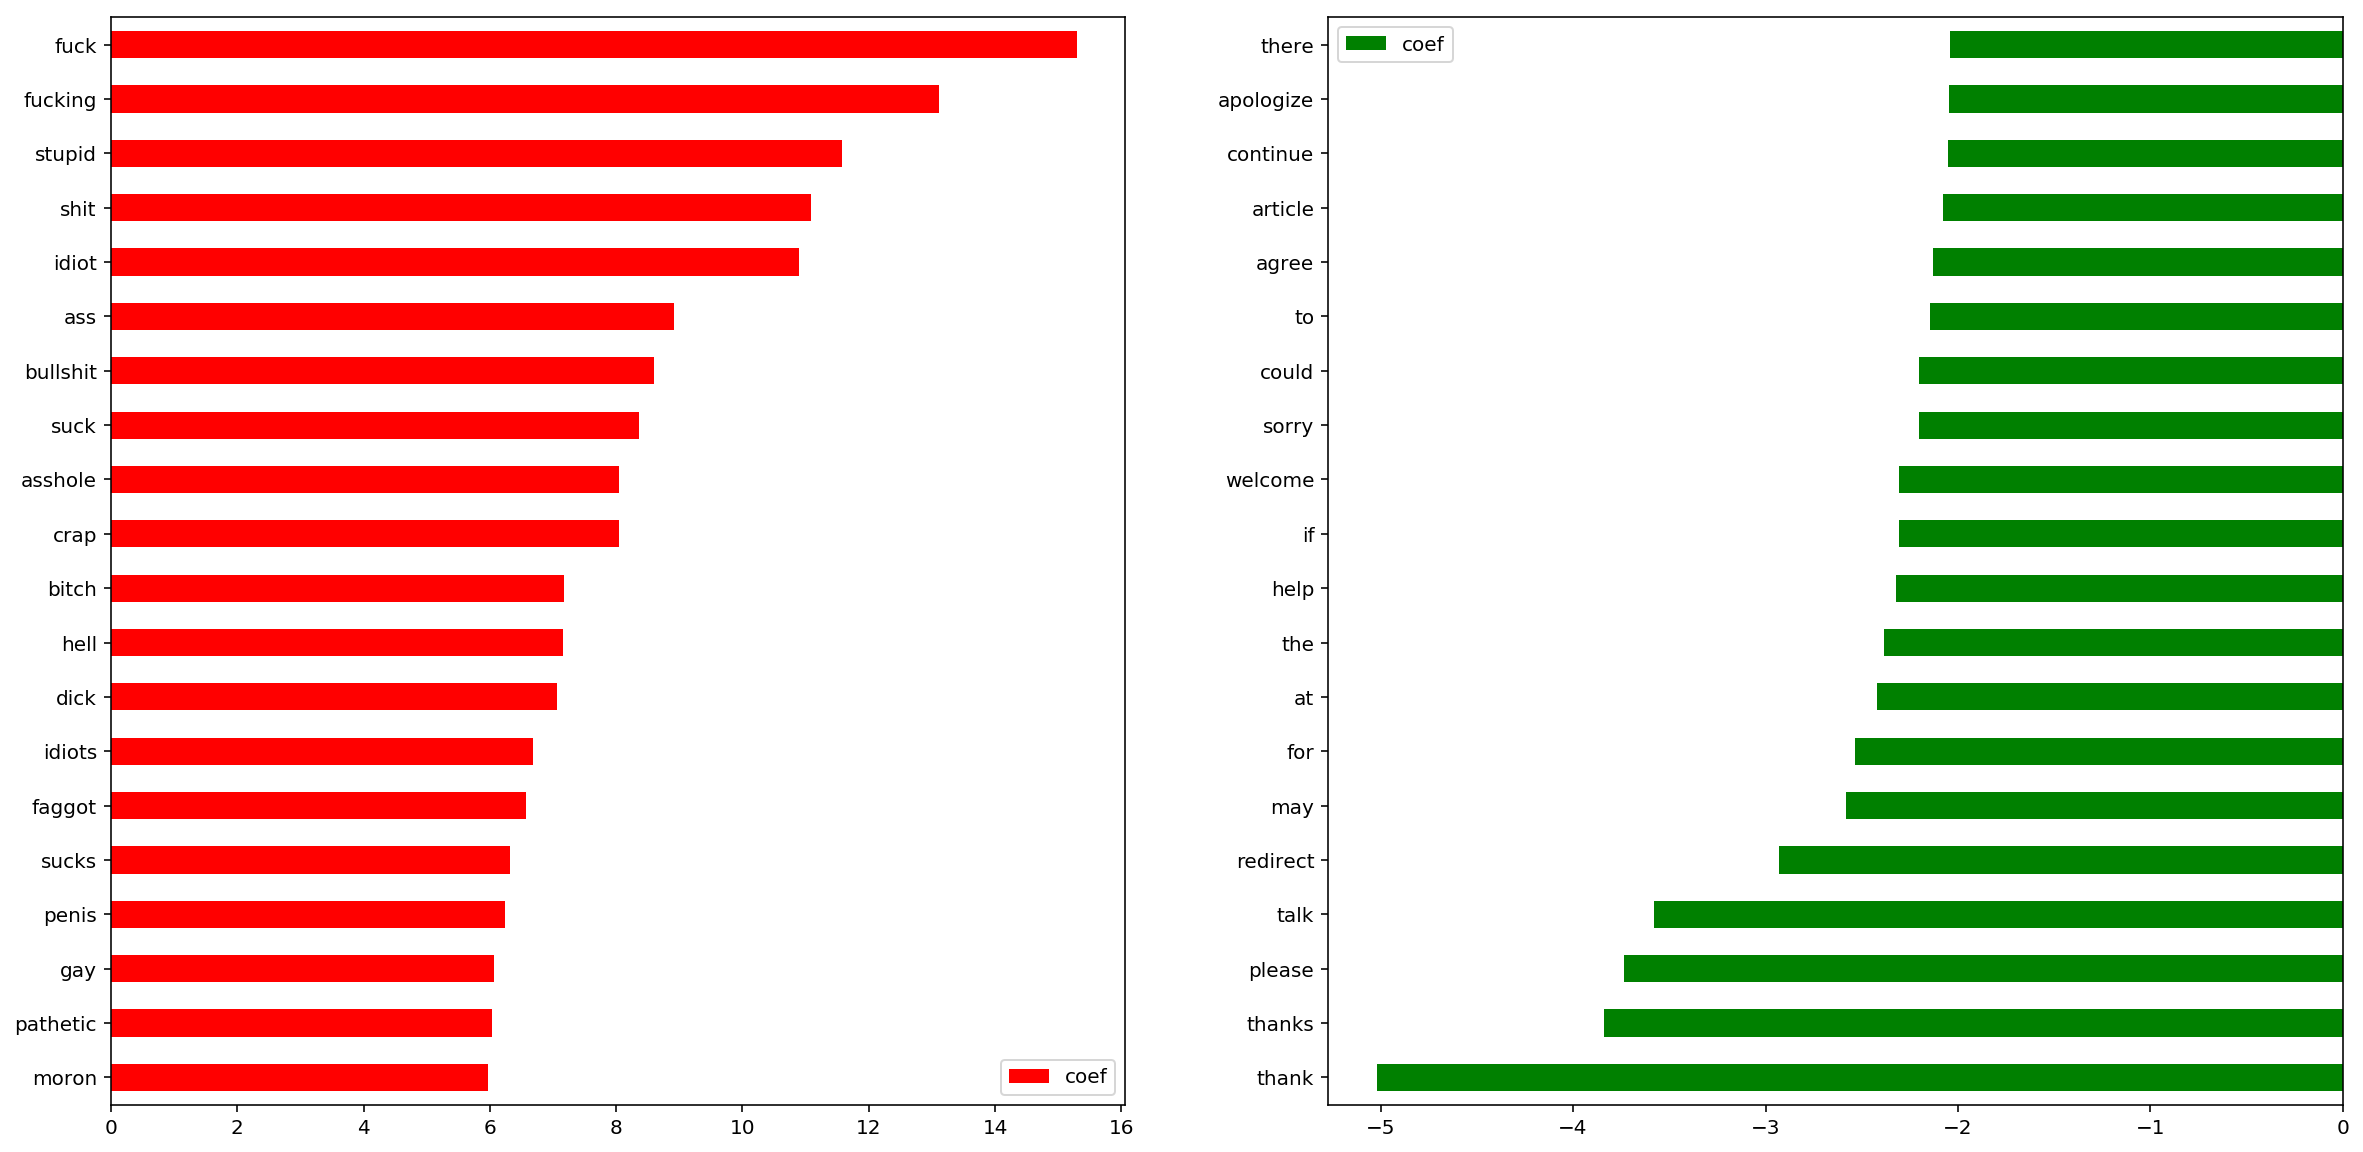

In [10]:
tfidf = TfidfVectorizer(lowercase=True, ngram_range=(1,1), max_features=50000) # UNIGRAM
plot_words_polarity(train, tfidf)

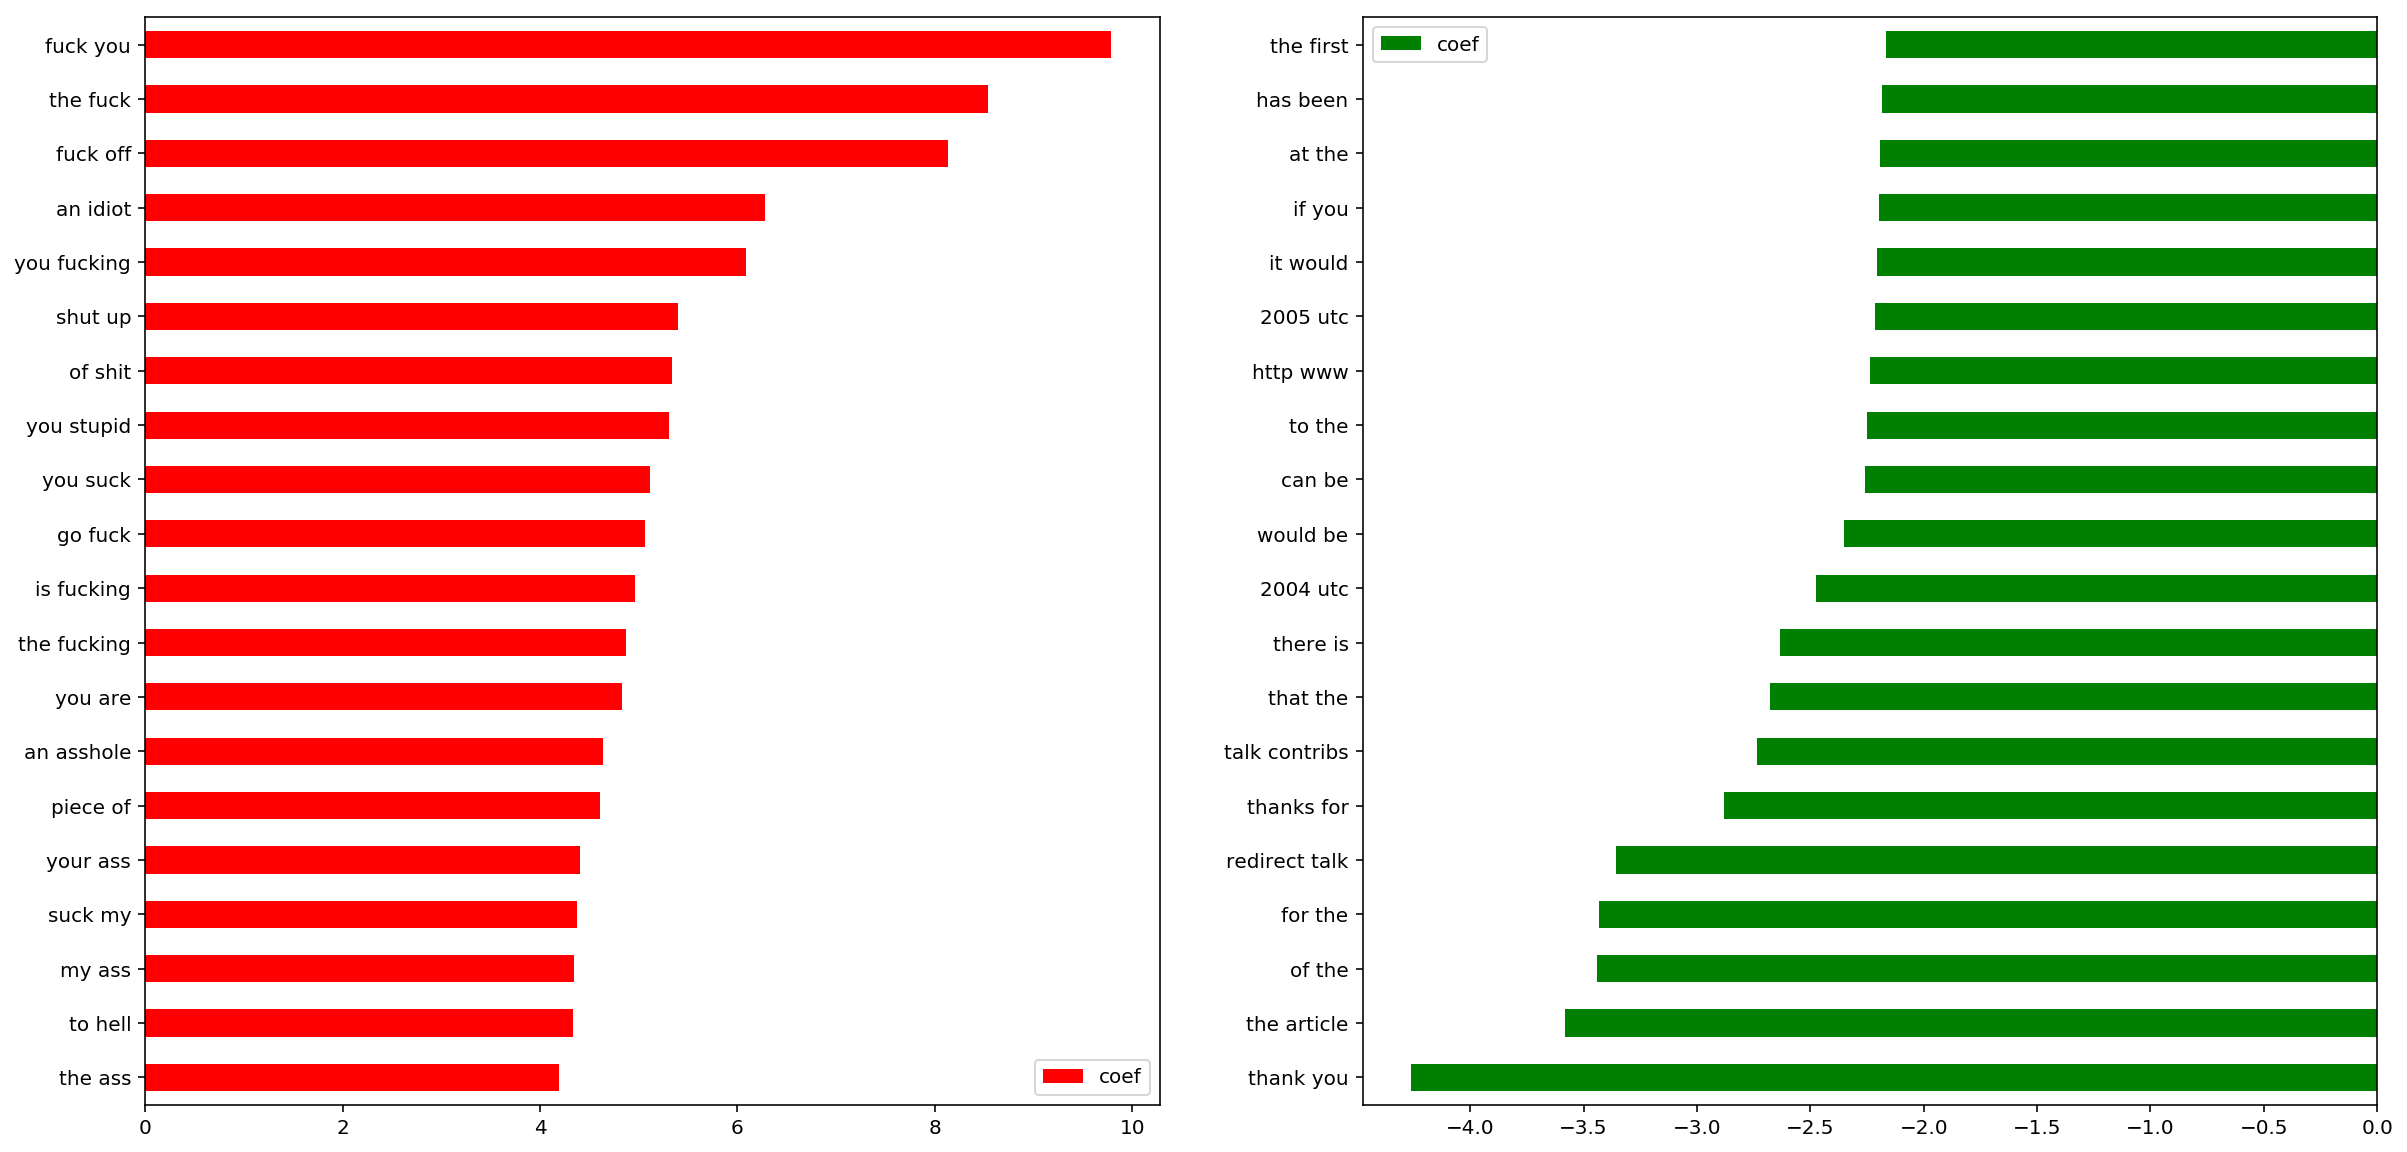

In [11]:
tfidf = TfidfVectorizer(lowercase=True, ngram_range=(2,2), max_features=50000) # UNIGRAM
plot_words_polarity(train, tfidf)

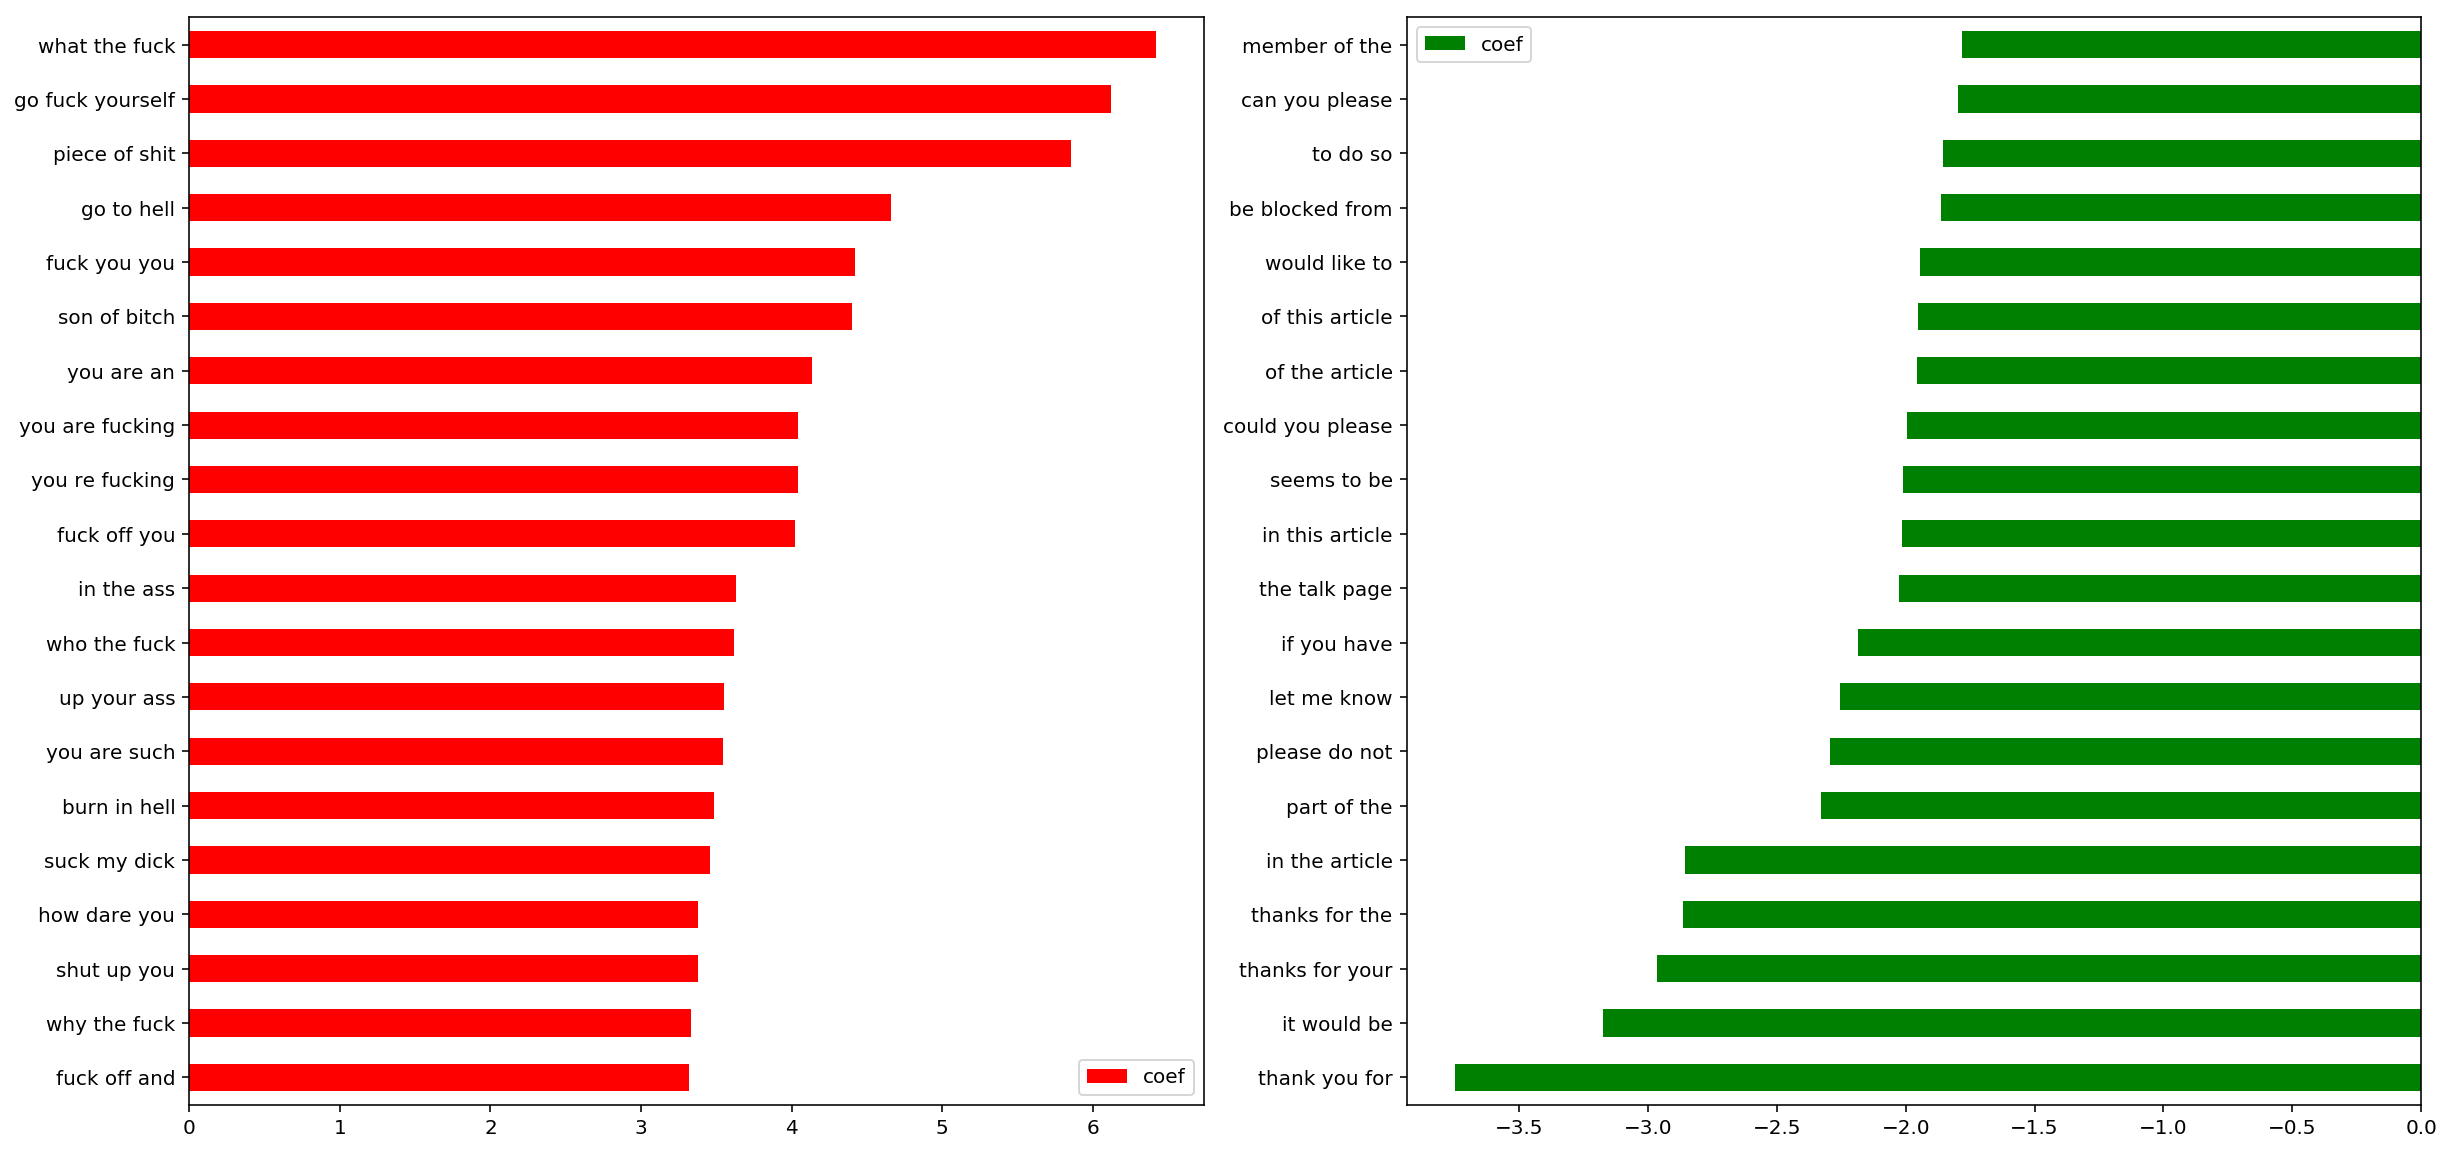

In [12]:
tfidf = TfidfVectorizer(lowercase=True, ngram_range=(3,3), max_features=50000) # UNIGRAM
plot_words_polarity(train, tfidf)

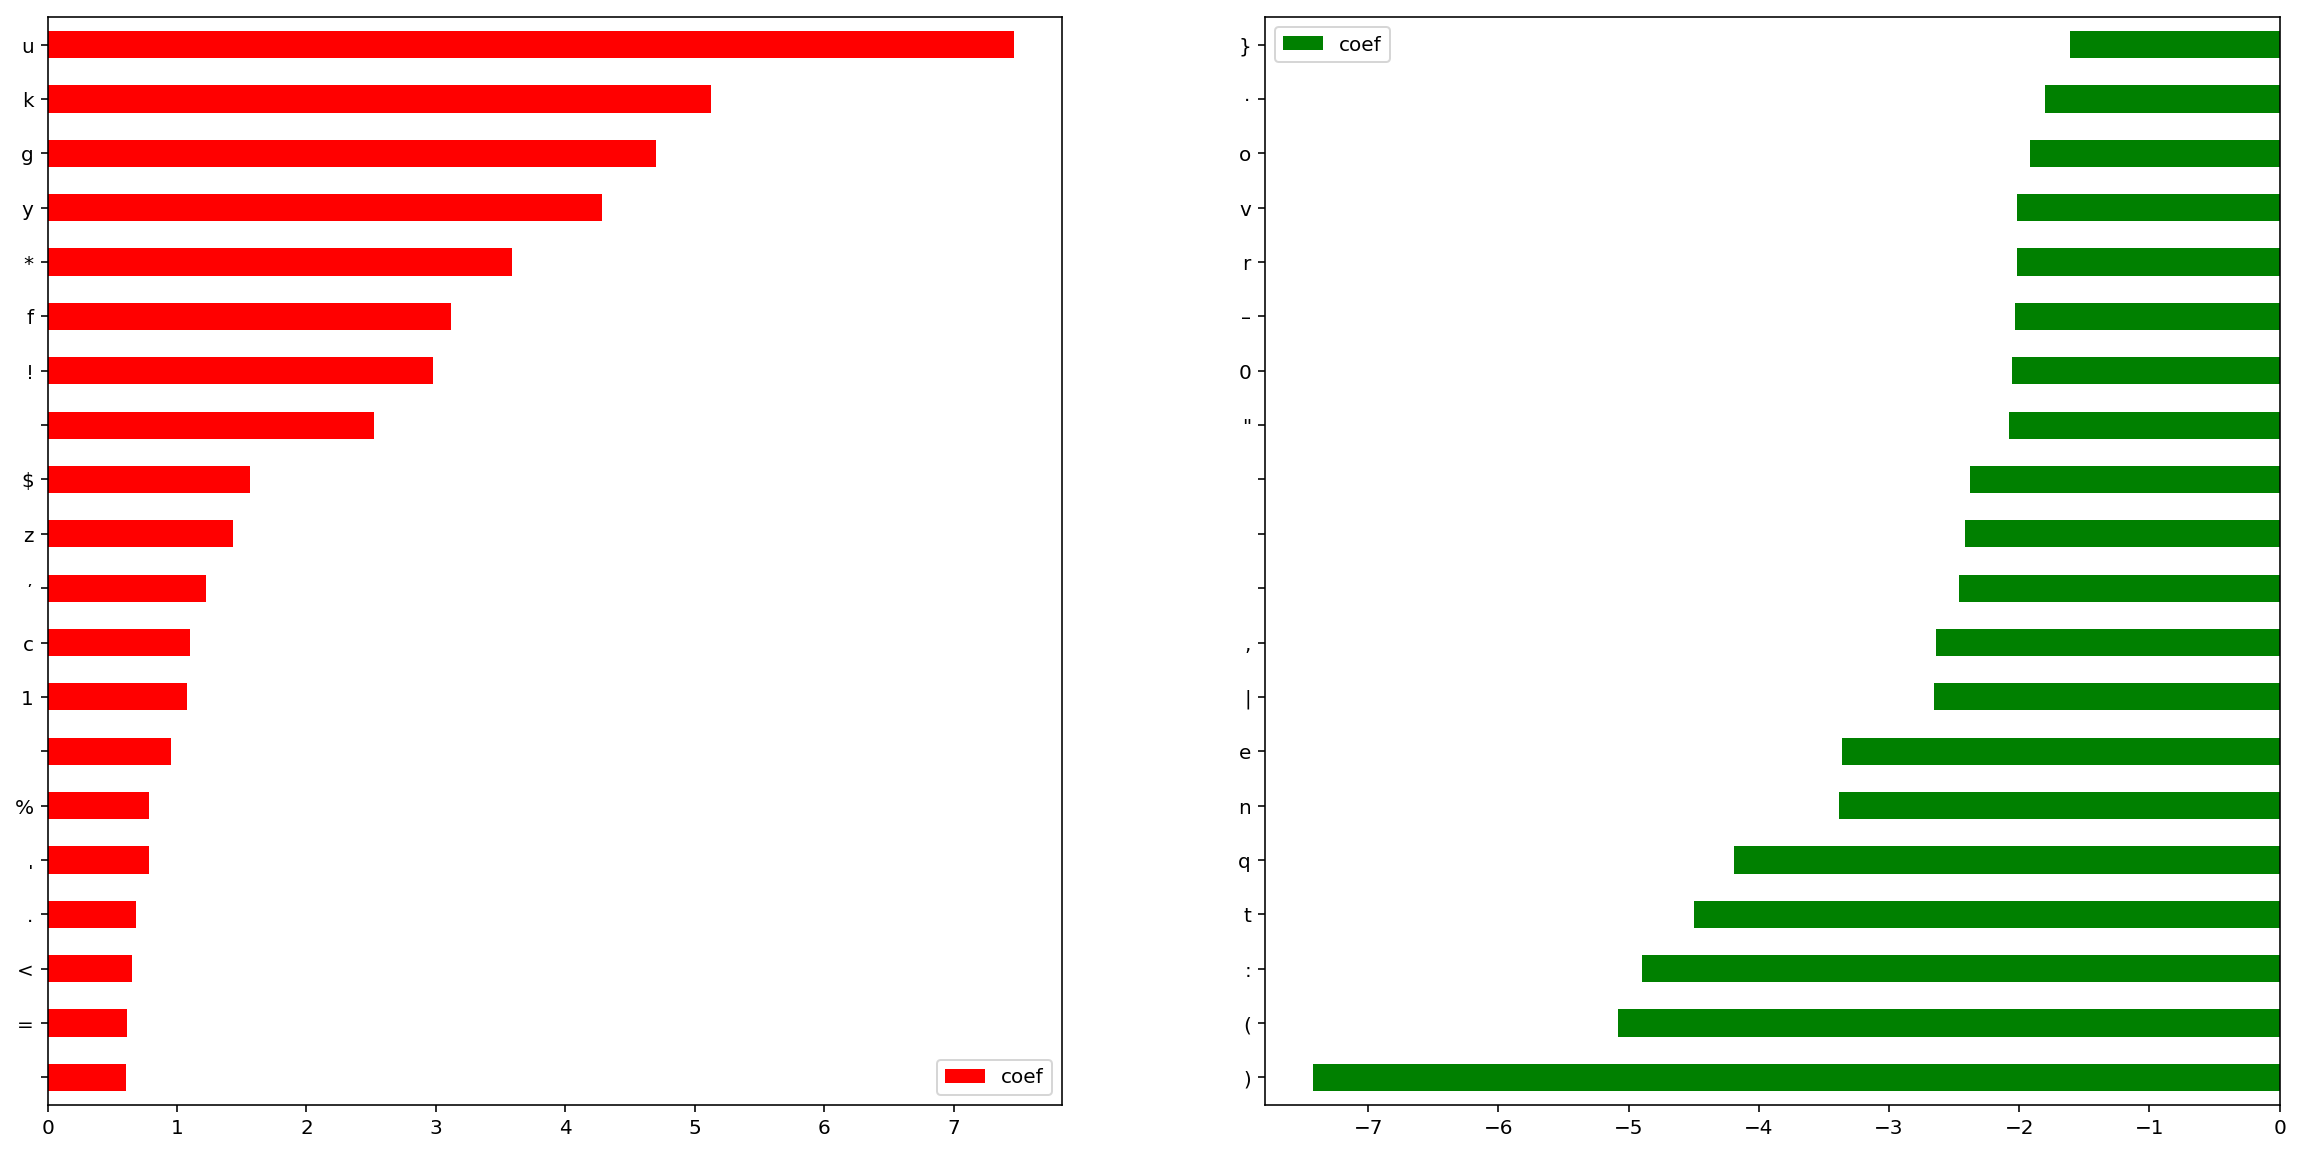

In [13]:
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', analyzer='char',
                        max_features=50000) # UNIGRAM
plot_words_polarity(train, tfidf)